In [150]:
import pandas as pd
import re
import string
import nltk
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud 
pd.set_option('display.max_colwidth', 100)
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection   
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier

### Loading the data and cleaning the data


In [133]:
Hotel_reviews = pd.read_csv(r"C:\Users\ahmoh\OneDrive\Desktop\Ahmed Project\ML AHMED\NLP\Hotel scam\deceptive-opinion.csv")


In [134]:
Hotel_reviews.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal....
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was less than $200 which also included breakfast voucher...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catching up on my reviews from the past several months:)...
3,truthful,omni,positive,TripAdvisor,"The Omni Chicago really delivers on all fronts, from the spaciousness of the rooms to the helpfu..."
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevator and that is what I got. The room was pleasantly ...


In [135]:
# remove the extra columns 
Hotel_reviews=Hotel_reviews.drop(['hotel','polarity','source'], axis=1)


In [136]:
Hotel_reviews.head()

,deceptive,text,punct%,body_len
0,truthful,We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal....,3.9,3.418719
1,truthful,Triple A rate with upgrade to view room was less than $200 which also included breakfast voucher...,4.6,2.995045
2,truthful,This comes a little late as I'm finally catching up on my reviews from the past several months:)...,3.1,3.895458
3,truthful,"The Omni Chicago really delivers on all fronts, from the spaciousness of the rooms to the helpfu...",2.9,3.570143
4,truthful,I asked for a high floor away from the elevator and that is what I got. The room was pleasantly ...,2.2,3.153777


Text(0.5, 1.0, 'Number of truthful and deceptive reviews')

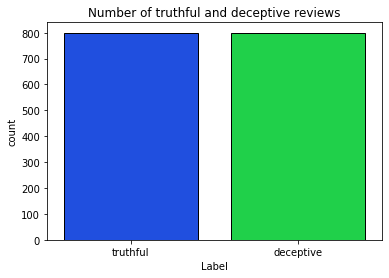

In [162]:
sns.countplot(Hotel_reviews.deceptive)
plt.xlabel('Label')
plt.title('Number of truthful and deceptive reviews')

### Feature engneering 

In [138]:
print("Hotel reviews has {} rows and {} columns".format(len(Hotel_reviews), len(Hotel_reviews.columns)))

Hotel reviews has 1600 rows and 2 columns


In [139]:
print("Out of {} rows, {} are deceptive , {} are not deceptive".format(len(Hotel_reviews),
                                                       len(Hotel_reviews[Hotel_reviews['deceptive']=='truthful']),
                                                       len(Hotel_reviews[Hotel_reviews['deceptive']=='deceptive'])))

Out of 1600 rows, 800 are deceptive , 800 are not deceptive


In [140]:
# Measure the % of punctuation
def punct_count(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

Hotel_reviews['punct%'] = Hotel_reviews['text'].apply(lambda x: punct_count(x))

Hotel_reviews.head()

,deceptive,text,punct%
0,truthful,We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal....,3.9
1,truthful,Triple A rate with upgrade to view room was less than $200 which also included breakfast voucher...,4.6
2,truthful,This comes a little late as I'm finally catching up on my reviews from the past several months:)...,3.1
3,truthful,"The Omni Chicago really delivers on all fronts, from the spaciousness of the rooms to the helpfu...",2.9
4,truthful,I asked for a high floor away from the elevator and that is what I got. The room was pleasantly ...,2.2


In [141]:
# Measure the length of the post 

Hotel_reviews['body_len'] = Hotel_reviews['text'].apply(lambda x: len(x) - x.count(" "))

Hotel_reviews.head()

,deceptive,text,punct%,body_len
0,truthful,We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal....,3.9,467
1,truthful,Triple A rate with upgrade to view room was less than $200 which also included breakfast voucher...,4.6,241
2,truthful,This comes a little late as I'm finally catching up on my reviews from the past several months:)...,3.1,897
3,truthful,"The Omni Chicago really delivers on all fronts, from the spaciousness of the rooms to the helpfu...",2.9,580
4,truthful,I asked for a high floor away from the elevator and that is what I got. The room was pleasantly ...,2.2,312


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018A0DB12388>,
      dtype=object)

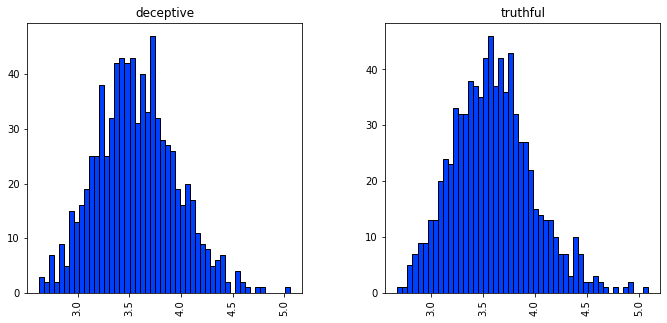

In [142]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
Hotel_reviews.hist(column='body_len', by='deceptive', bins=50,figsize=(11,5))

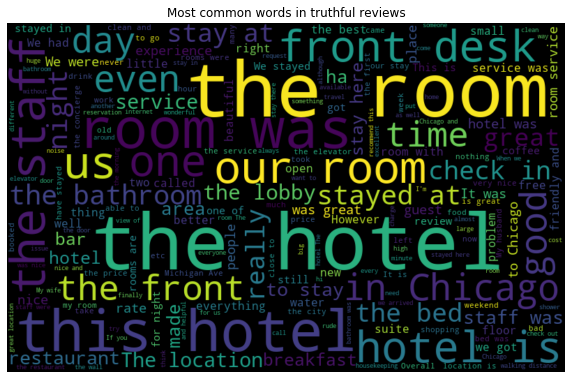

In [160]:
Truthful_words =' '.join([text for text in Hotel_reviews['text'][Hotel_reviews['deceptive'] == 'truthful']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(Truthful_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most common words in truthful reviews")
plt.show()

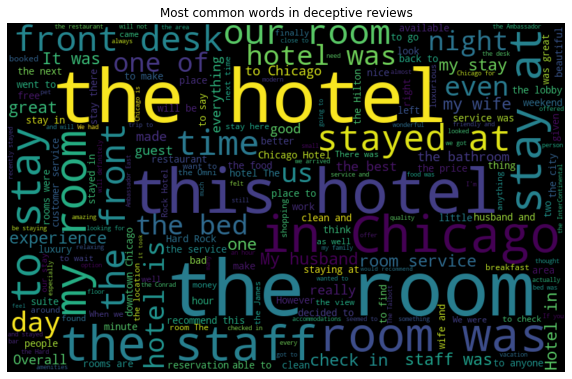

In [161]:
deceptive_words =' '.join([text for text in Hotel_reviews['text'][Hotel_reviews['deceptive'] == 'deceptive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(deceptive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most common words in deceptive reviews")
plt.show()

### Obtaning the plot of punct%	body_len and Transform the data

In [148]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

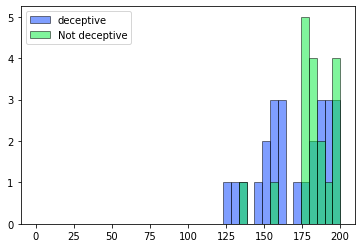

In [152]:
bins = np.linspace(0, 200, 40)

pyplot.hist(Hotel_reviews[Hotel_reviews['deceptive']=='deceptive']['body_len'], bins, alpha=0.5, label='deceptive')
pyplot.hist(Hotel_reviews[Hotel_reviews['deceptive']=='truthful']['body_len'], bins, alpha=0.5, label='Not deceptive')
pyplot.legend(loc='upper left')
pyplot.show()

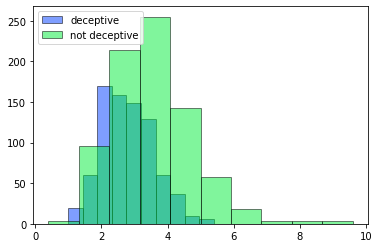

In [158]:
pyplot.hist(Hotel_reviews[Hotel_reviews['deceptive']=='deceptive']['punct%'], alpha=0.5, label='deceptive')
pyplot.hist(Hotel_reviews[Hotel_reviews['deceptive']=='truthful']['punct%'], alpha=0.5, label='not deceptive')
pyplot.legend(loc='upper left')
pyplot.show()

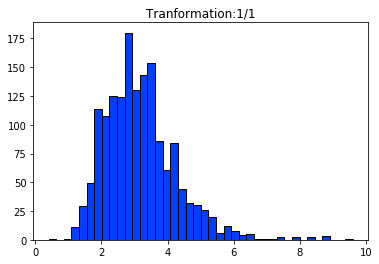

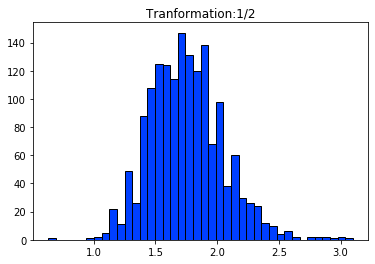

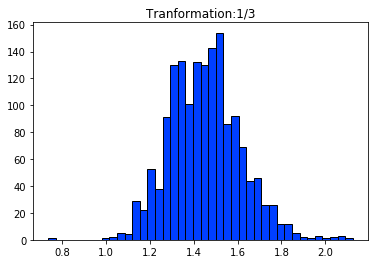

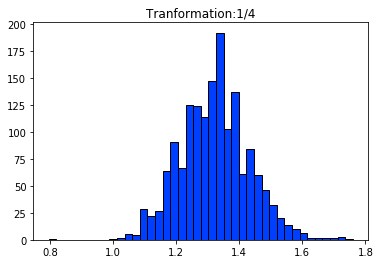

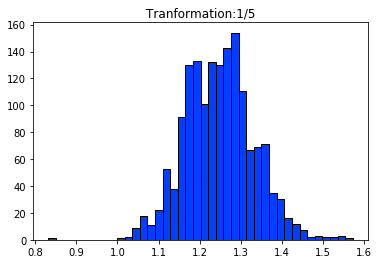

In [159]:
for i in [1,2,3,4,5]:
    pyplot.hist((Hotel_reviews['punct%'])**(1/i),bins=40)
    pyplot.title("Tranformation:1/{}".format(str(i)))
    pyplot.show()

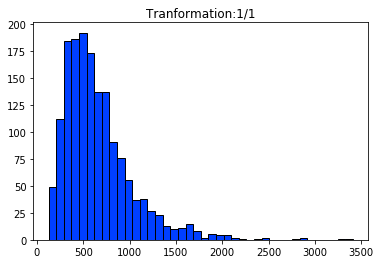

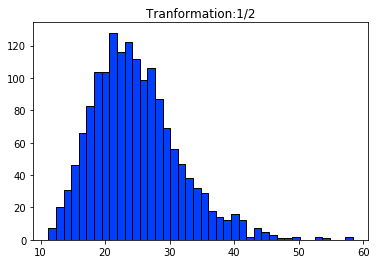

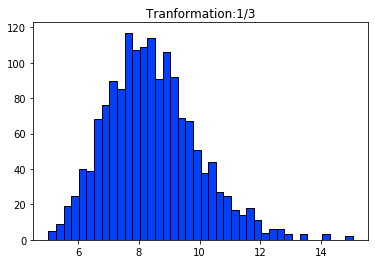

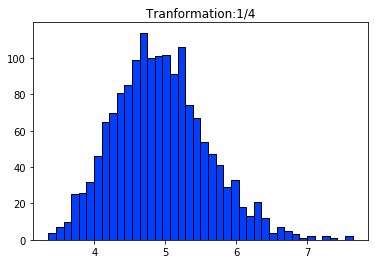

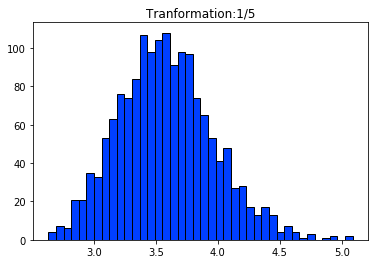

In [155]:
for i in [1,2,3,4,5]:
    pyplot.hist((Hotel_reviews['body_len'])**(1/i),bins=40)
    pyplot.title("Tranformation:1/{}".format(str(i)))
    pyplot.show()    

In [156]:
# Transform punct%

#Hotel_reviews['punct%']=Hotel_reviews['punct%']**(1/2)

# Transform body_len

Hotel_reviews['body_len']=Hotel_reviews['body_len']**(1/5)

In [157]:
Hotel_reviews.head()

,deceptive,text,punct%,body_len
0,truthful,We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal....,3.9,3.418719
1,truthful,Triple A rate with upgrade to view room was less than $200 which also included breakfast voucher...,4.6,2.995045
2,truthful,This comes a little late as I'm finally catching up on my reviews from the past several months:)...,3.1,3.895458
3,truthful,"The Omni Chicago really delivers on all fronts, from the spaciousness of the rooms to the helpfu...",2.9,3.570143
4,truthful,I asked for a high floor away from the elevator and that is what I got. The room was pleasantly ...,2.2,3.153777


### USE NLTK to create tokens, remove punctuation and remove stop words

In [21]:
def text_cleaning(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [22]:
# Use TfidfVectorizer to transform the data 

tfidf_vect = TfidfVectorizer(analyzer=text_cleaning)
X_tfidf = tfidf_vect.fit_transform(Hotel_reviews['text'])


X_features = pd.concat([Hotel_reviews['body_len'], Hotel_reviews['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,7645,7646,7647,7648,7649,7650,7651,7652,7653,7654
0,3.418719,3.9,0.026911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.995045,4.6,0.036858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.895458,3.1,0.021416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.570143,2.9,0.027051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.153777,2.2,0.047209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# try out cross validation to obtian what section of the data produce the vest accuracy 
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, Hotel_reviews['deceptive'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.265625, 0.7125  , 0.703125, 0.671875, 0.196875])

In [24]:
# Split the data into testing and training 
X_train, X_test, y_train, y_test = train_test_split(X_features, Hotel_reviews['deceptive'], test_size=0.2)

In [25]:
# Obtaing the top features in the data

rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [26]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.04485514400118377, 1490),
 (0.025676387754935717, 'punct%'),
 (0.01746238454039375, 4068),
 (0.012429454992692303, 137),
 (0.01085382868267509, 4091),
 (0.010543581021339739, 3455),
 (0.010116147102545589, 4150),
 (0.008826540500980414, 5531),
 (0.00823128031205852, 5450),
 (0.008196133192204958, 0)]

#### Using random forest and TfidfVectorizer to predict the Spam comments 

In [27]:
# Obtaining precision, recall, accuracy, support
y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label='deceptive', average='binary')

In [28]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 0.839 / Recall: 0.807 / Accuracy: 0.825


### Using RF, TfidfVectorizer and Grid seach to obtain the tree with the least performace 

In [29]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='deceptive', average='binary')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [30]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 0.764 / Recall: 0.702 / Accuracy: 0.741
Est: 10 / Depth: 20 ---- Precision: 0.732 / Recall: 0.714 / Accuracy: 0.725
Est: 10 / Depth: 30 ---- Precision: 0.72 / Recall: 0.72 / Accuracy: 0.719
Est: 10 / Depth: None ---- Precision: 0.77 / Recall: 0.832 / Accuracy: 0.791
Est: 50 / Depth: 10 ---- Precision: 0.824 / Recall: 0.814 / Accuracy: 0.819
Est: 50 / Depth: 20 ---- Precision: 0.857 / Recall: 0.857 / Accuracy: 0.856
Est: 50 / Depth: 30 ---- Precision: 0.847 / Recall: 0.857 / Accuracy: 0.85
Est: 50 / Depth: None ---- Precision: 0.811 / Recall: 0.851 / Accuracy: 0.825
Est: 100 / Depth: 10 ---- Precision: 0.852 / Recall: 0.82 / Accuracy: 0.838
Est: 100 / Depth: 20 ---- Precision: 0.839 / Recall: 0.807 / Accuracy: 0.825
Est: 100 / Depth: 30 ---- Precision: 0.878 / Recall: 0.807 / Accuracy: 0.847
Est: 100 / Depth: None ---- Precision: 0.838 / Recall: 0.832 / Accuracy: 0.834


### Compareing the results of RF with the TfidfVectorizer and the counter vectorized for the top pram combination

In [31]:
# Results for the TfidfVectorizer

rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_features, Hotel_reviews['deceptive'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,10.114196,0.061741,0.130801,0.005036,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.875000,0.843750,0.859375,0.850000,0.843750,0.854375,0.011792,1
7,5.155196,0.051966,0.081801,0.001939,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.859375,0.846875,0.862500,0.859375,0.831250,0.851875,0.011626,2
11,9.861396,0.513180,0.120801,0.010777,None,300,"{'max_depth': None, 'n_estimators': 300}",0.843750,0.865625,0.843750,0.865625,0.828125,0.849375,0.014443,3
10,5.169195,0.078332,0.081403,0.001626,None,150,"{'max_depth': None, 'n_estimators': 150}",0.840625,0.856250,0.853125,0.853125,0.837500,0.848125,0.007552,4
4,5.130396,0.032536,0.082204,0.001167,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.871875,0.834375,0.853125,0.818750,0.853125,0.846250,0.018157,5


In [32]:
# obtaing CountVectorizer
count_vect = CountVectorizer(analyzer=text_clean)
X_count = count_vect.fit_transform(Hotel_reviews['text'])
X_count_feat = pd.concat([Hotel_reviews['body_len'], Hotel_reviews['punct%'], pd.DataFrame(X_count.toarray())], axis=1)

X_count_feat.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,7645,7646,7647,7648,7649,7650,7651,7652,7653,7654
0,3.418719,3.9,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.995045,4.6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.895458,3.1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.570143,2.9,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.153777,2.2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Results for the CountVectorizer

rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=2, n_jobs=-1)
gs_fit = gs.fit(X_count_feat, Hotel_reviews['text'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

C:\Users\ahmoh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
2,5.888999,0.004998,5.946999,0.008003,30,300,"{'max_depth': 30, 'n_estimators': 300}",0.005,0.005,0.005,0.0,1
4,5.317498,0.035501,3.132500,0.028502,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.005,0.005,0.005,0.0,1
5,11.022496,0.086502,6.397001,0.063999,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.005,0.005,0.005,0.0,1
7,7.450998,0.037005,3.002498,0.043499,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.005,0.005,0.005,0.0,1
8,15.505497,0.043504,6.310503,0.011494,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.005,0.005,0.005,0.0,1


### Duplicating the tests using GradientBoostingClassifier

In [34]:
# Using GB and Grid seach to obtain the tree with the least performace 
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='deceptive', average='binary')
    print('Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        est, max_depth, lr, round(precision, 3), round(recall, 3), 
        round((y_pred==y_test).sum()/len(y_pred), 3)))

In [35]:
for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)

Est: 50 / Depth: 3 / LR: 0.01 ---- Precision: 0.723 / Recall: 0.745 / Accuracy: 0.728
Est: 50 / Depth: 3 / LR: 0.1 ---- Precision: 0.8 / Recall: 0.82 / Accuracy: 0.806
Est: 50 / Depth: 3 / LR: 1 ---- Precision: 0.764 / Recall: 0.764 / Accuracy: 0.762
Est: 50 / Depth: 7 / LR: 0.01 ---- Precision: 0.707 / Recall: 0.764 / Accuracy: 0.722
Est: 50 / Depth: 7 / LR: 0.1 ---- Precision: 0.819 / Recall: 0.789 / Accuracy: 0.806
Est: 50 / Depth: 7 / LR: 1 ---- Precision: 0.811 / Recall: 0.826 / Accuracy: 0.816
Est: 50 / Depth: 11 / LR: 0.01 ---- Precision: 0.713 / Recall: 0.727 / Accuracy: 0.716
Est: 50 / Depth: 11 / LR: 0.1 ---- Precision: 0.779 / Recall: 0.789 / Accuracy: 0.781
Est: 50 / Depth: 11 / LR: 1 ---- Precision: 0.811 / Recall: 0.801 / Accuracy: 0.806
Est: 50 / Depth: 15 / LR: 0.01 ---- Precision: 0.703 / Recall: 0.752 / Accuracy: 0.716
Est: 50 / Depth: 15 / LR: 0.1 ---- Precision: 0.718 / Recall: 0.758 / Accuracy: 0.728
Est: 50 / Depth: 15 / LR: 1 ---- Precision: 0.741 / Recall: 0.745

### Final comparsion of TfidfVectorizer in RF and GB To select the best model

###Vectorizing on only the traning set not the entire set

In [36]:
X_train, X_test, y_train, y_test = train_test_split(Hotel_reviews[['text', 'body_len', 'punct%']], Hotel_reviews['deceptive'], test_size=0.2)

In [37]:
tfidf_vect = TfidfVectorizer(analyzer=text_clean)
tfidf_vect_fit = tfidf_vect.fit(X_train['text'])

tfidf_train = tfidf_vect_fit.transform(X_train['text'])
tfidf_test = tfidf_vect_fit.transform(X_test['text'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826
0,3.457366,6.3,0.031743,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.740264,2.3,0.023025,0.0,0.0,0.0,0.0,0.099626,0.197291,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.354701,3.2,0.012580,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.088773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.372076,1.8,0.031818,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.275430,5.0,0.031651,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Evaluating RF vs GB


In [38]:
import time
rf = RandomForestClassifier(n_estimators=150, max_depth=10, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='deceptive', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 1.452 / Predict time: 0.183 ---- Precision: 0.824 / Recall: 0.889 / Accuracy: 0.856


In [39]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=7)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='deceptive', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 70.236 / Predict time: 0.073 ---- Precision: 0.822 / Recall: 0.817 / Accuracy: 0.828


In [40]:
# The values of n_estimators and max_depth were chosen based on the best values of accuracy obtained from the Grid search

In [41]:
# based on the reults we decide that RF is faster and produced accurate results and therefore RF with TfidfVectorizer is the best model to predict the spam job post